In [472]:
import pandas as pd
import math

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Метеостанция Санкт-Петербург, Россия, WMO_ID=26063, выборка с 01.02.2005 по 25.01.2023, все дни

Кодировка: UTF-8

Информация предоставлена сайтом ["Расписание Погоды"](http://rp5.ru/)

Обозначения метеопараметров:

обозначение | параметр 
:---:|:---
Дата / Местное время |	Время в данном населённом пункте. Учитывается летнее/зимнее время
T |	Температура воздуха (градусы Цельсия) на высоте 2 метра над поверхностью земли
Po |	Атмосферное давление на уровне станции (миллиметры ртутного столба)
P |	Атмосферное давление, приведенное к среднему уровню моря (миллиметры ртутного столба)
Pa |	Барическая тенденция: изменение атмосферного давления за последние три часа (миллиметры ртутного столба)
U |	Относительная влажность (%) на высоте 2 метра над поверхностью земли
DD |	Направление ветра (румбы) на высоте 10-12 метров над земной поверхностью, осредненное за 10-минутный период, непосредственно предшествовавший сроку наблюдения
Ff |	Cкорость ветра на высоте 10-12 метров над земной поверхностью, осредненная за 10-минутный период, непосредственно предшествовавший сроку наблюдения (метры в секунду)
ff10 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за 10-минутный период, непосредственно предшествующий сроку наблюдения (метры в секунду)
ff3 |	Максимальное значение порыва ветра на высоте 10-12 метров над земной поверхностью за период между сроками (метры в секунду)
N |	Общая облачность
WW |	Текущая погода, сообщаемая с метеорологической станции
W1 |	Прошедшая погода между сроками наблюдения 1
W2 |	Прошедшая погода между сроками наблюдения 2
Tn |	Минимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Tx |	Максимальная температура воздуха (градусы Цельсия) за прошедший период (не более 12 часов)
Cl |	Слоисто-кучевые, слоистые, кучевые и кучево-дождевые облака
Nh |	Количество всех наблюдающихся облаков Cl или, при отсутствии облаков Cl, количество всех наблюдающихся облаков Cm
H |	Высота основания самых низких облаков (м)
Cm |	Высококучевые, высокослоистые и слоисто-дождевые облака
Ch |	Перистые, перисто-кучевые и перисто-слоистые облака
VV |	Горизонтальная дальность видимости (км)
Td |	Температура точки росы на высоте 2 метра над поверхностью земли (градусы Цельсия)
RRR |	Количество выпавших осадков (миллиметры)
tR |	Период времени, за который накоплено указанное количество осадков (часы)
E |	Состояние поверхности почвы без снега или измеримого ледяного покрова
Tg |	Минимальная температура поверхности почвы за ночь. (градусы Цельсия)
E' |	Состояние поверхности почвы со снегом или измеримым ледяным покровом
sss |	Высота снежного покрова (см)

In [425]:
dataset = '26063.01.02.2005.25.01.2023.1.0.0.ru.utf8.00000000.csv'

In [426]:
df = pd.read_csv(dataset, sep=';', comment='#', quotechar='"', 
                 index_col=False, low_memory=False)
df

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,25.01.2023 15:00,1.6,762.4,762.8,-2.0,89.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,25.01.2023 12:00,0.8,764.4,764.8,-2.0,88.0,"Ветер, дующий с юго-запада",4.0,NaN,NaN,...,NaN,NaN,10.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,25.01.2023 09:00,0.3,766.4,766.8,-1.7,87.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,19.0,-1.7,NaN,NaN,NaN,NaN,NaN,NaN
3,25.01.2023 06:00,0.2,768.1,768.6,-1.8,89.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,NaN,4.0,-1.5,0.6,12.0,NaN,NaN,NaN,NaN
4,25.01.2023 03:00,0.3,769.9,770.3,-1.1,92.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,...,NaN,NaN,4.0,-0.8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52328,01.02.2005 15:00,-7.5,753.5,754.1,NaN,76.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высокослоистые непросвечивающие или слоисто-до...,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-11.0,NaN,NaN,NaN,NaN,NaN,NaN
52329,01.02.2005 12:00,-8.8,752.6,753.2,NaN,76.0,"Ветер, дующий с юго-востока",3.0,NaN,NaN,...,Высокослоистые просвечивающие.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.2,NaN,NaN,NaN,NaN,NaN,NaN
52330,01.02.2005 09:00,-9.4,751.5,752.1,NaN,76.0,"Ветер, дующий с юго-юго-востока",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-12.9,3.0,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,19.0
52331,01.02.2005 06:00,-9.6,750.4,751.0,NaN,75.0,"Ветер, дующий с юга",3.0,NaN,NaN,...,Высококучевые башенкообразные или хлопьевидные.,"Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,-13.2,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
# Check data types

df.dtypes

Местное время в Санкт-Петербурге     object
T                                   float64
Po                                  float64
P                                   float64
Pa                                  float64
U                                   float64
DD                                   object
Ff                                  float64
ff10                                float64
ff3                                 float64
N                                    object
WW                                   object
W1                                   object
W2                                   object
Tn                                  float64
Tx                                  float64
Cl                                   object
Nh                                   object
H                                    object
Cm                                   object
Ch                                   object
VV                                   object
Td                              

In [429]:
# Check NaN values

df.isna().sum()

Местное время в Санкт-Петербурге        0
T                                      62
Po                                     60
P                                      67
Pa                                  23210
U                                     141
DD                                     87
Ff                                     82
ff10                                51563
ff3                                 49269
N                                     154
WW                                      0
W1                                  33065
W2                                  33067
Tn                                  42020
Tx                                  45774
Cl                                  10917
Nh                                   7243
H                                    7047
Cm                                  21495
Ch                                  26074
VV                                     79
Td                                     82
RRR                               

Преобразование местного времени в datetime и использование его в качестве индекса

In [430]:
df['date'] = pd.to_datetime(df['Местное время в Санкт-Петербурге'])
df.drop('Местное время в Санкт-Петербурге', inplace=True, axis=1)
df = df.set_index("date").sort_index()

Изучаем уникальные значения в столбцах N и Nh

In [431]:
print(df['N'].unique())
print(df['Nh'].unique())

['100%.' '70 – 80%.' '90  или более, но не 100%' '60%.' 'Облаков нет.'
 '50%.' '20–30%.' '40%.' '10%  или менее, но не 0'
 'Небо не видно из-за тумана и/или других метеорологических явлений.' nan]
['100%.' '70 – 80%.' '20–30%.' '60%.' '40%.' nan '50%.'
 '90  или более, но не 100%' '10%  или менее, но не 0' 'Облаков нет.'
 'Небо не видно из-за тумана и/или других метеорологических явлений.']


Заменяем категориальных данных для облачности (N и Nh) на числовые. Для варианта "Небо не видно" выбираем 1.1

In [432]:
N_cat = ['Облаков нет.', '10%  или менее, но не 0', '20–30%.', '40%.',
         '50%.', '60%.', '70 – 80%.', '90  или более, но не 100%', '100%.',
         'Небо не видно из-за тумана и/или других метеорологических явлений.']
N_num = [0.0, 0.1, 0.25, 0.4, 0.5, 0.6, 0.75, 0.9, 1.0, 1.1]
df['N'].replace(N_cat, N_num, inplace=True)
df['Nh'].replace(N_cat, N_num, inplace=True)

Изучаем уникальные значения в столбце H 

In [433]:
print(df['H'].unique())

['200-300' '300-600' '2500 или более, или облаков нет.' nan '100-200'
 '1500-2000' '1000-1500' '600-1000' 'Менее 50' '2000-2500' '50-100']


Заменяем категориальные данные для высоты облаков H на числовые. 
Используем средние значения указанного диапазона или границу для крайних.

In [435]:
H_cat = ['Менее 50', '50-100', '100-200', '200-300', '300-600', '600-1000',
    '1000-1500', '1500-2000', '2000-2500', '2500 или более, или облаков нет.']
H_num = [50, 75, 150, 250, 450, 800, 1250, 1750, 2250, 2500]
df['H'].replace(H_cat, H_num, inplace=True)

Изучаем данные в столбцах VV и RRR

In [436]:
print(df['VV'].unique())
print(df['RRR'].unique())

['4.0' '10.0' '2.0' '0.2' '20.0' '1.0' '0.5' nan '0.05' '1.6' '2.2' '17.0'
 '3.7' '0.7' '19.0' 'менее 0.1' '50.0' '0.4' '29.0' '0.1' '27.0' '6.0'
 '0.3' '45.0' '4.7' '1.5' '18.0' '13.0' '12.0' '11.0' '15.0' '14.0' '16.0'
 '2.7' '3.1' '8.0' '3.0']
[nan '3.0' '0.3' 'Следы осадков' '12.0' '9.0' '1.0' '0.5' '0.1' '0.7'
 '0.2' '2.0' '0.4' '0.6' '17.0' '0.9' '5.0' '4.0' '0.8' '7.0' '8.0' '19.0'
 '6.0' '38.0' '14.0' '16.0' '10.0' '11.0' 'Осадков нет' '23.0' '30.0'
 '21.0' '13.0' '15.0' '22.0' '18.0' '26.0' '24.0' '20.0' '25.0' '28.0'
 '27.0' '35.0' '48.0' '31.0' '29.0']


В столбце "Горизонтальная дальность видимости" почти все значения числовые, но встречается значение "Менее 0.1" - заменяем его на 0.5

In [437]:
df['VV'].replace('менее 0.1', 0.05, inplace=True)

В столбце "Количество выпавших осадков" заменяем "следы осадков" на 0.05 (так как минимальное чиловое значение в этом столбце = 0.1).
Значение "осадков нет" меняем на 0.

In [438]:
RRR_cat = ['Следы осадков', 'Осадков нет']
RRR_num = [0.05, 0]
df['RRR'].replace(RRR_cat, RRR_num, inplace=True)

Разбираемся с ветром, изучаем значения в столбце DD, и преобразуем столбцы DD и Ff в векторное представление ветра. Направление определяем по столбцу DD, а длина вектора будет равна силе ветра из столбца Ff.
Результирующие столбцы - Wind_W (вектор, направленный с запада вдоль оси X) и Wind_S (вектор, направленный с запада вдоль оси X)(вектор, направленный с юга вдоль оси Y) 


In [439]:
df['DD'].unique()

array(['Ветер, дующий с юго-востока', 'Ветер, дующий с юга',
       'Ветер, дующий с юго-юго-востока',
       'Ветер, дующий с северо-северо-востока',
       'Ветер, дующий с северо-востока',
       'Ветер, дующий с северо-северо-запада',
       'Ветер, дующий с северо-запада',
       'Ветер, дующий с западо-северо-запада', 'Штиль, безветрие',
       'Ветер, дующий с юго-запада', 'Ветер, дующий с западо-юго-запада',
       'Ветер, дующий с запада', 'Ветер, дующий с севера',
       'Ветер, дующий с востоко-юго-востока',
       'Ветер, дующий с юго-юго-запада', 'Ветер, дующий с востока',
       'Ветер, дующий с востоко-северо-востока', nan], dtype=object)

In [440]:
# Wind categories
DD_cat = ['Штиль, безветрие', 
          'Ветер, дующий с востоко-северо-востока',
          'Ветер, дующий с северо-востока',
          'Ветер, дующий с северо-северо-востока',
          'Ветер, дующий с севера',
          'Ветер, дующий с северо-северо-запада',
          'Ветер, дующий с северо-запада',
          'Ветер, дующий с западо-северо-запада',
          'Ветер, дующий с запада', 
          'Ветер, дующий с западо-юго-запада',
          'Ветер, дующий с юго-запада',
          'Ветер, дующий с юго-юго-запада',
          'Ветер, дующий с юга',
          'Ветер, дующий с юго-юго-востока',
          'Ветер, дующий с юго-востока',
          'Ветер, дующий с востоко-юго-востока',
          'Ветер, дующий с востока',
         ]
# Arrays with cos and sin of corresponding angles
DD_cos = [math.cos(x*math.pi/8) for x in range(-7, 9)]
DD_sin = [math.sin(x*math.pi/8) for x in range(-7, 9)]
# First element is 'No wind, zero vector'
DD_cos.insert(0, 0)
DD_sin.insert(0, 0)

In [441]:
df['Wind_W'] = df['DD'].replace(DD_cat, DD_cos) * df['Ff']
df['Wind_S'] = df['DD'].replace(DD_cat, DD_sin) * df['Ff']
df.drop(['DD','Ff'], inplace=True, axis=1)

In [450]:
cols = ['T', 'P', 'U', 'N', 'VV', 'Td']
wdf = df[cols].dropna()

In [452]:
wdf.describe()

,T,P,U,N,Td
count,51970.000000,51970.000000,51970.000000,51970.000000,51970.000000
mean,6.830718,760.078134,75.934655,0.709035,2.371843
std,9.817481,8.520114,16.477249,0.367905,8.638216
min,-27.700000,720.000000,14.000000,0.000000,-34.800000
25%,0.300000,754.800000,67.000000,0.400000,-3.100000
50%,6.300000,760.200000,81.000000,0.900000,2.100000
75%,14.600000,765.400000,89.000000,1.000000,9.400000
max,36.700000,793.900000,100.000000,1.100000,23.800000


In [455]:
# add temperature at next moment

wdf['Y'] = wdf['T'].shift(-1)

In [456]:
wdf

,T,P,U,N,VV,Td,Y
date,,,,,,,
2005-01-02 03:00:00,-8.8,750.0,83.0,1.0,4.0,-11.2,-9.6
2005-01-02 06:00:00,-9.6,751.0,75.0,1.0,10.0,-13.2,-9.4
2005-01-02 09:00:00,-9.4,752.1,76.0,1.0,10.0,-12.9,-8.8
2005-01-02 12:00:00,-8.8,753.2,76.0,1.0,10.0,-12.2,-7.5
2005-01-02 15:00:00,-7.5,754.1,76.0,1.0,10.0,-11.0,-7.3
...,...,...,...,...,...,...,...
2023-12-01 09:00:00,-3.9,758.6,84.0,1.0,10.0,-6.2,-4.0
2023-12-01 12:00:00,-4.0,758.2,91.0,1.0,10.0,-5.3,-3.8
2023-12-01 15:00:00,-3.8,757.3,91.0,1.0,4.0,-5.0,-3.5


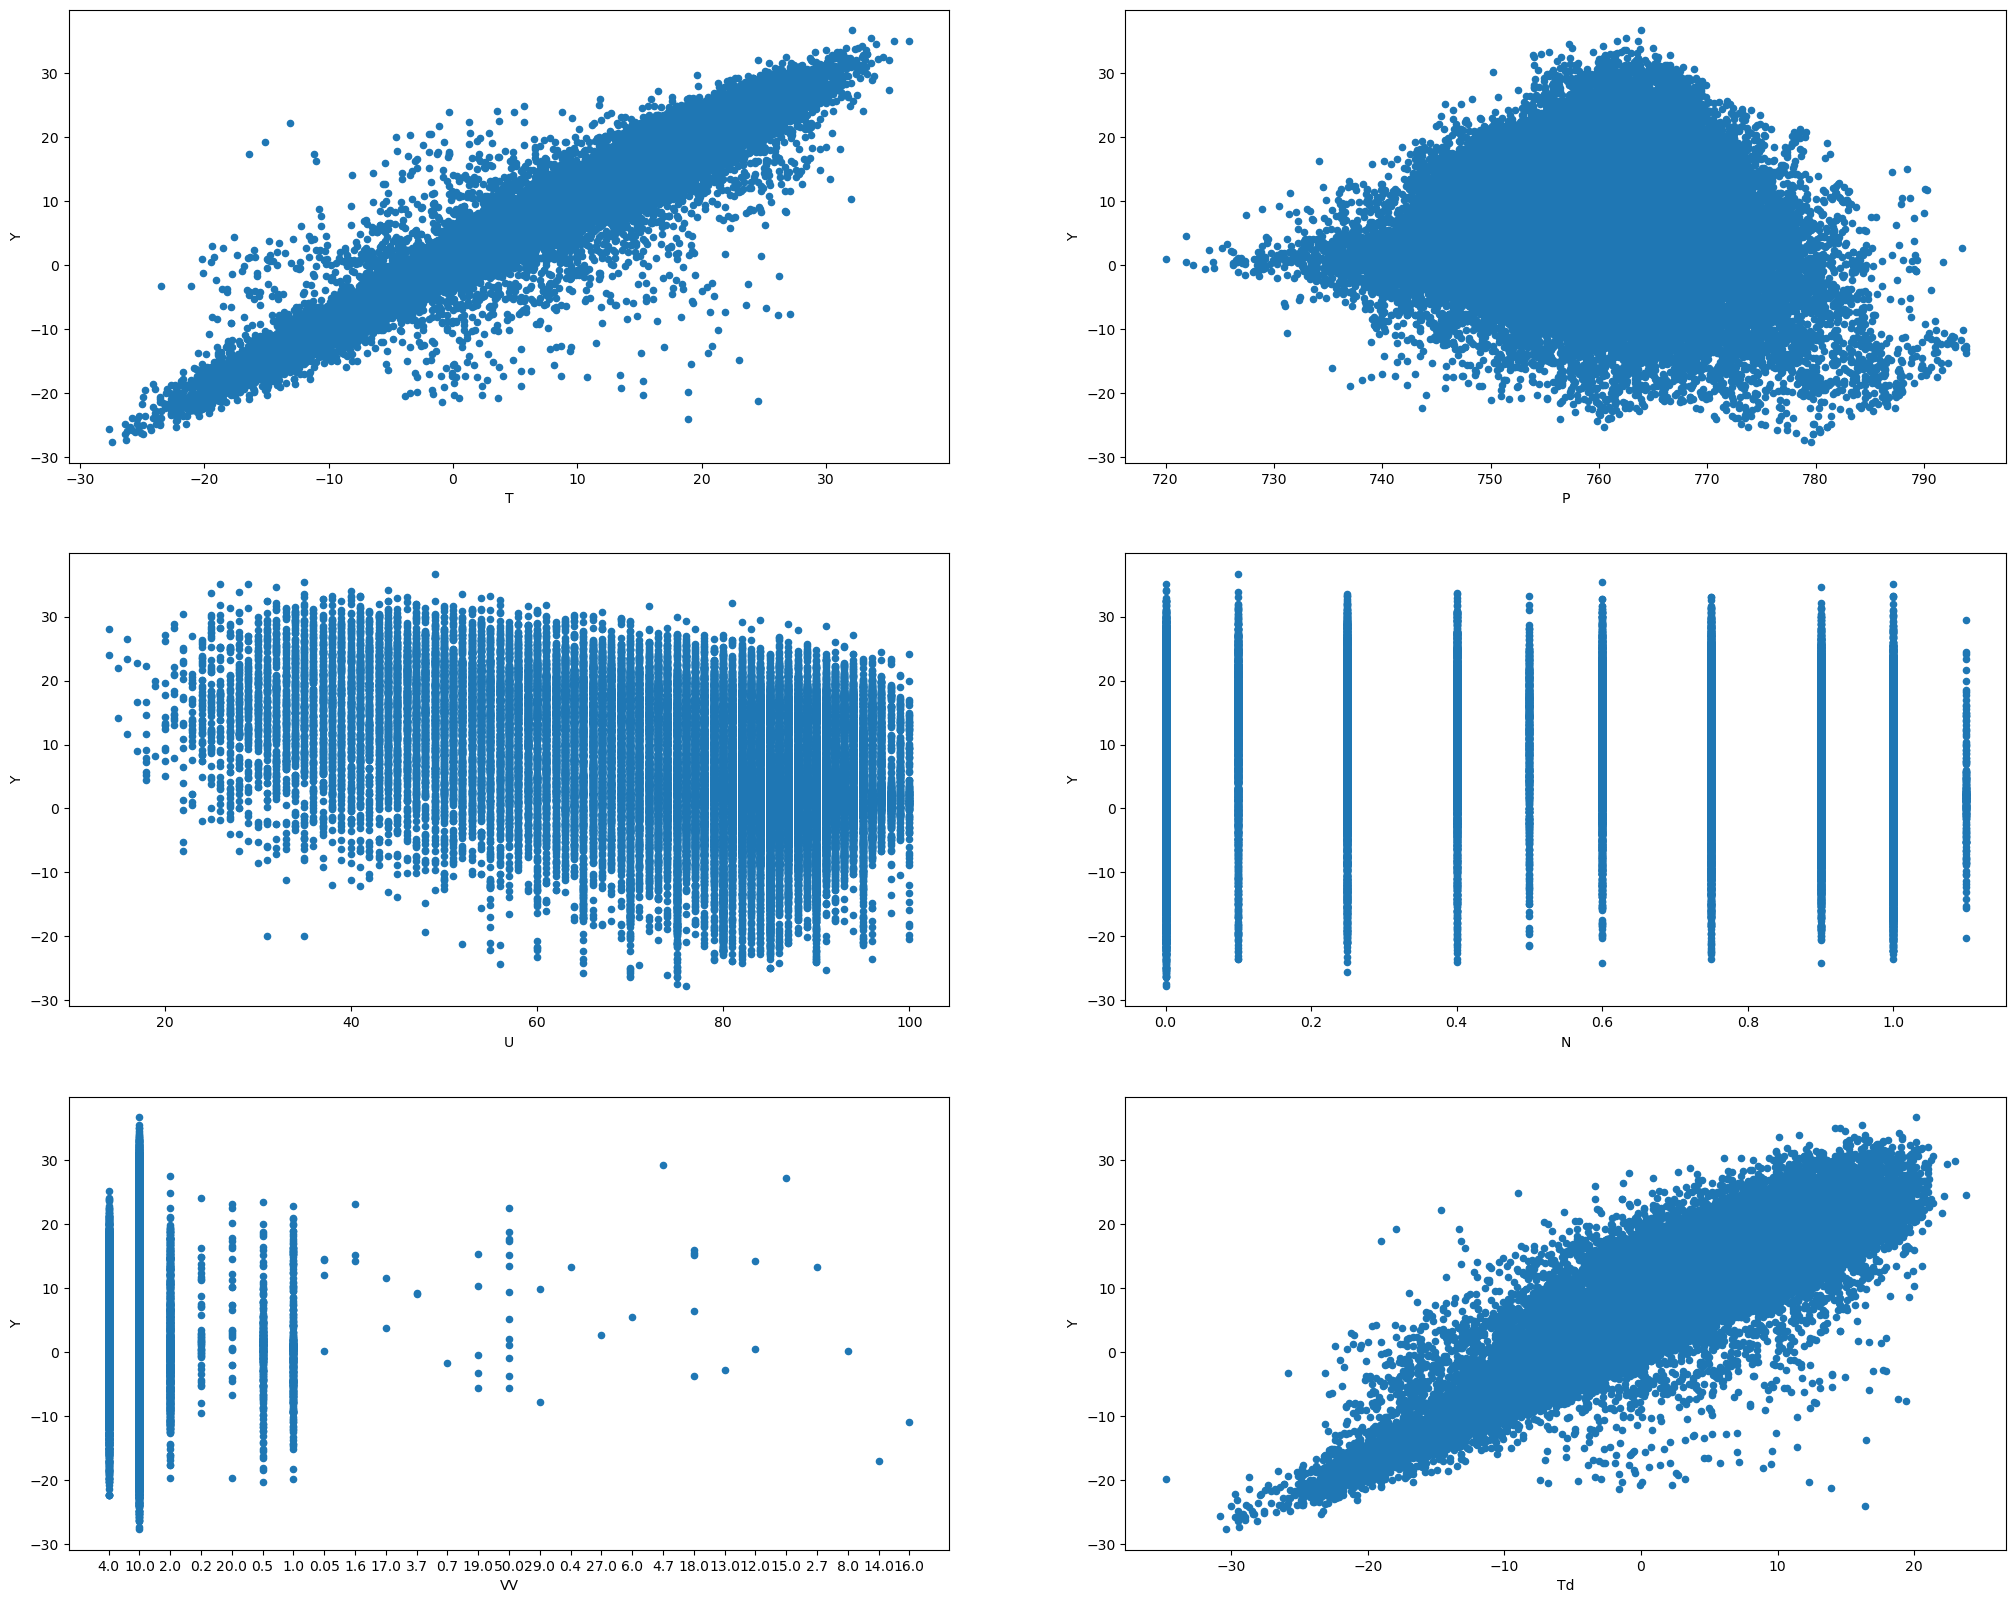

In [460]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 20))
for idx, feature in enumerate(wdf.columns):
    if feature == "Y":
        continue
    wdf.plot(feature, "Y", subplots=True, kind="scatter", ax=axes[idx // 2, idx % 2])

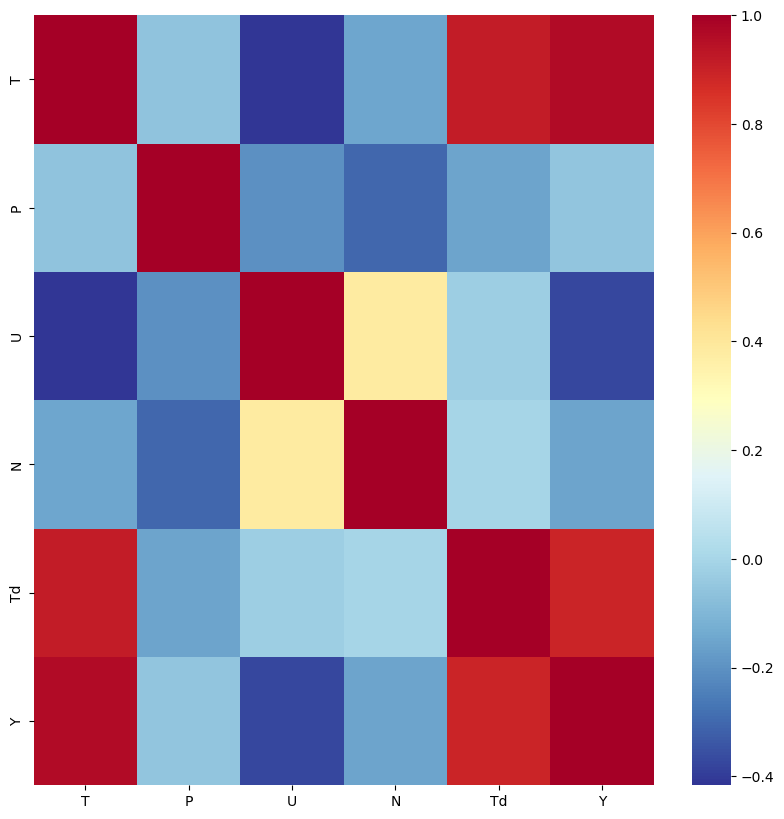

In [463]:
plt.figure(figsize=(10,10))
sns.heatmap(wdf.corr(numeric_only=True), cmap="RdYlBu_r");

In [474]:
wdf = wdf.dropna()
X = wdf[cols]
y = wdf['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [475]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


6.565004571660399
0.9341566924281168


In [483]:
linreg.coef_

array([ 0.87007242,  0.00992506, -0.00185645, -0.48518874, -0.0040194 ,
        0.11012253])

In [489]:
X_test['Y'] = y_test
X_test['prediction'] = y_pred

In [491]:
X_test.sort_index()

,T,P,U,N,VV,Td,Y,prediction
date,,,,,,,,
2005-01-02 06:00:00,-9.6,751.0,75.0,1.00,10.0,-13.2,-9.4,-9.417118
2005-01-02 15:00:00,-7.5,754.1,76.0,1.00,10.0,-11.0,-7.3,-7.318785
2005-01-02 21:00:00,-7.8,757.7,72.0,1.00,10.0,-11.9,-12.1,-7.635761
2005-01-03 00:00:00,-12.1,753.9,75.0,0.75,10.0,-15.6,-13.7,-11.706513
2005-01-05 21:00:00,2.9,761.7,93.0,1.00,10.0,1.9,8.7,3.194420
...,...,...,...,...,...,...,...,...
2023-10-01 06:00:00,-9.2,765.1,76.0,1.00,10.0,-12.7,-9.1,-8.875941
2023-11-01 03:00:00,-1.0,763.1,83.0,1.00,10.0,-3.6,-1.0,-0.772077
2023-11-01 06:00:00,-1.0,763.1,82.0,1.00,10.0,-3.7,-1.2,-0.781233
